### Q1 [3 points] Build a decision tree predicting partisanship. (small data)

In [56]:
# importing libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [57]:
FX_indicators_2020_df = pd.read_csv('FX_indicators_2020_rand_10k.csv')

In [59]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,MOVED_RDMA,MOVED_DRMA,MOVED_AWMA,MOVED_ADMA,MOVED_ARMA,MOVED_RDMB,MOVED_DRMB,MOVED_AWMB,MOVED_ADMB,MOVED_ARMB
0,84508,3,0,25,4,0,0,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35758,2,0,45,3,0,1,34,33,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32007,2,0,23,1,1,0,37,34,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,631210,1,0,82,1,0,0,44,40,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,154033,1,55,78,0,2,0,42,36,48,...,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,84185,1,0,61,2,0,0,34,34,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,621870,3,0,23,0,4,1,32,32,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,122126,2,0,42,0,1,2,44,31,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,92539,1,0,33,0,1,1,50,49,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
FX_indicators_2020_df.describe()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,PRS16_PD,PRS16_PR,MSG_A,MSG_B
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,318449.940800,2.006500,0.575700,50.957900,1.226500,0.71030,0.616000,39.253600,37.051800,41.519400,...,0.974000,0.047600,0.14490,0.522600,0.5290,12.593900,46.994370,51.325400,0.076700,0.075900
std,185242.673013,0.816654,5.382543,18.240581,1.308422,1.05142,0.945428,6.880001,7.163243,7.255252,...,0.645109,0.353195,0.48962,0.539924,0.5457,1.083005,5.751838,5.812378,0.266128,0.264851
min,38.000000,1.000000,0.000000,18.000000,0.000000,0.00000,0.000000,25.000000,22.000000,31.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,8.000000,34.100000,35.000000,0.000000,0.000000
25%,159502.250000,1.000000,0.000000,36.000000,0.000000,0.00000,0.000000,34.000000,32.000000,35.000000,...,1.000000,0.000000,0.00000,0.000000,0.0000,12.000000,42.800000,47.800000,0.000000,0.000000
50%,317957.500000,2.000000,0.000000,51.000000,1.000000,0.00000,0.000000,38.000000,36.000000,41.000000,...,1.000000,0.000000,0.00000,1.000000,1.0000,12.000000,45.800000,52.500000,0.000000,0.000000
75%,479134.250000,3.000000,0.000000,65.000000,2.000000,1.00000,1.000000,44.000000,40.000000,48.000000,...,1.000000,0.000000,0.00000,1.000000,1.0000,13.000000,50.500000,55.500000,0.000000,0.000000
max,636539.000000,3.000000,100.000000,101.000000,9.000000,9.00000,9.000000,65.000000,65.000000,65.000000,...,9.000000,8.000000,9.00000,9.000000,9.0000,16.000000,63.100000,64.300000,1.000000,1.000000


In [61]:
FX_indicators_2020_df.dtypes

VOTER_ID       int64
SET_NO         int64
OPP_SEX        int64
AGE            int64
HH_ND          int64
               ...  
MOVED_RDMB    object
MOVED_DRMB    object
MOVED_AWMB    object
MOVED_ADMB    object
MOVED_ARMB    object
Length: 152, dtype: object

In [62]:
FX_indicators_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 152 entries, VOTER_ID to MOVED_ARMB
dtypes: float64(2), int64(105), object(45)
memory usage: 11.6+ MB


In [63]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(10000, 152)
VOTER_ID         0
SET_NO           0
OPP_SEX          0
AGE              0
HH_ND            0
              ... 
MOVED_RDMB    9648
MOVED_DRMB    9648
MOVED_AWMB    9648
MOVED_ADMB    9648
MOVED_ARMB    9648
Length: 152, dtype: int64


In [64]:
FX_indicators_2020_df.isnull().any()

VOTER_ID      False
SET_NO        False
OPP_SEX       False
AGE           False
HH_ND         False
              ...  
MOVED_RDMB     True
MOVED_DRMB     True
MOVED_AWMB     True
MOVED_ADMB     True
MOVED_ARMB     True
Length: 152, dtype: bool

In [65]:
FX_indicators_2020_df.drop(columns = ['CAND1S', 'CAND2S', 'MESSAGE'], axis=1, inplace=True)

In [66]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'COMM_LT10':'ED_4COL'].columns, axis = 1)

In [67]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'H_AFDLN3P':'MSG_B'].columns, axis = 1)

In [68]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'CAND1_UND':'MOVED_ARMB'].columns, axis = 1)

In [69]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,NH_MULT,HISP,GENDER_F,GENDER_M,VG_14_DV,D2,R2,D3,R3,I3
0,84508,3,0,25,4,0,0,38,39,38,...,1,4,0,1,NaN,Y,N,Y,N,N
1,35758,2,0,45,3,0,1,34,33,35,...,0,3,0,1,NaN,NaN,NaN,N,N,N
2,32007,2,0,23,1,1,0,37,34,51,...,0,4,1,0,N,Y,N,Y,N,N
3,631210,1,0,82,1,0,0,44,40,51,...,2,2,1,0,Y,NaN,NaN,N,N,N
4,154033,1,55,78,0,2,0,42,36,48,...,2,14,0,1,Y,Y,N,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,84185,1,0,61,2,0,0,34,34,33,...,6,6,1,0,Y,Y,N,Y,N,N
9996,621870,3,0,23,0,4,1,32,32,33,...,2,5,1,0,NaN,Y,N,Y,N,N
9997,122126,2,0,42,0,1,2,44,31,49,...,0,4,1,0,N,N,Y,N,Y,NaN
9998,92539,1,0,33,0,1,1,50,49,51,...,2,0,0,1,Y,Y,N,Y,N,Y


In [70]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(10000, 26)
VOTER_ID        0
SET_NO          0
OPP_SEX         0
AGE             0
HH_ND           0
HH_NR           0
HH_NI           0
MED_AGE         0
MED_AGE_M       0
MED_AGE_F       0
NH_WHITE        0
NH_AA           0
NH_NATAM        0
NH_ASIAN        0
NH_HPI          0
NH_OTHER        0
NH_MULT         0
HISP            0
GENDER_F        0
GENDER_M        0
VG_14_DV     2578
D2           2401
R2           2401
D3              0
R3              0
I3           1215
dtype: int64


In [71]:
FX_indicators_2020_df.dropna(inplace=True)

In [72]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,NH_MULT,HISP,GENDER_F,GENDER_M,VG_14_DV,D2,R2,D3,R3,I3
2,32007,2,0,23,1,1,0,37,34,51,...,0,4,1,0,N,Y,N,Y,N,N
4,154033,1,55,78,0,2,0,42,36,48,...,2,14,0,1,Y,Y,N,Y,N,N
7,225667,2,0,52,4,0,1,42,36,48,...,2,14,0,1,N,Y,N,Y,N,Y
8,467628,1,0,33,1,0,0,41,34,42,...,2,3,1,0,Y,Y,N,Y,N,N
13,53164,3,0,64,2,0,0,32,32,33,...,2,5,0,1,Y,Y,N,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,312132,1,0,55,2,0,0,33,32,33,...,2,1,1,0,N,Y,N,Y,N,N
9991,453405,1,0,55,0,1,0,25,22,31,...,2,2,0,1,N,Y,N,Y,N,N
9993,176513,3,0,72,0,1,1,46,41,47,...,0,5,1,0,Y,N,Y,N,Y,N
9995,84185,1,0,61,2,0,0,34,34,33,...,6,6,1,0,Y,Y,N,Y,N,N


In [73]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(4876, 26)
VOTER_ID     0
SET_NO       0
OPP_SEX      0
AGE          0
HH_ND        0
HH_NR        0
HH_NI        0
MED_AGE      0
MED_AGE_M    0
MED_AGE_F    0
NH_WHITE     0
NH_AA        0
NH_NATAM     0
NH_ASIAN     0
NH_HPI       0
NH_OTHER     0
NH_MULT      0
HISP         0
GENDER_F     0
GENDER_M     0
VG_14_DV     0
D2           0
R2           0
D3           0
R3           0
I3           0
dtype: int64


In [74]:
FX_indicators_2020_df_new = pd.get_dummies(FX_indicators_2020_df)

In [75]:
FX_indicators_2020_df_new

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,D2_N,D2_Y,R2_N,R2_Y,D3_N,D3_Y,R3_N,R3_Y,I3_N,I3_Y
2,32007,2,0,23,1,1,0,37,34,51,...,0,1,1,0,0,1,1,0,1,0
4,154033,1,55,78,0,2,0,42,36,48,...,0,1,1,0,0,1,1,0,1,0
7,225667,2,0,52,4,0,1,42,36,48,...,0,1,1,0,0,1,1,0,0,1
8,467628,1,0,33,1,0,0,41,34,42,...,0,1,1,0,0,1,1,0,1,0
13,53164,3,0,64,2,0,0,32,32,33,...,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,312132,1,0,55,2,0,0,33,32,33,...,0,1,1,0,0,1,1,0,1,0
9991,453405,1,0,55,0,1,0,25,22,31,...,0,1,1,0,0,1,1,0,1,0
9993,176513,3,0,72,0,1,1,46,41,47,...,1,0,0,1,1,0,0,1,1,0
9995,84185,1,0,61,2,0,0,34,34,33,...,0,1,1,0,0,1,1,0,1,0


In [76]:
X = FX_indicators_2020_df_new.drop(columns = ['VG_14_DV_Y','VG_14_DV_N', 'D2_N', 'D2_Y', 'R2_N', 'R2_Y', 'D3_N', 'D3_Y',
                                              'R3_N', 'R3_Y','I3_N', 'I3_Y'])
y = FX_indicators_2020_df_new['D2_Y']

In [77]:
X

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,NH_WHITE,NH_AA,NH_NATAM,NH_ASIAN,NH_HPI,NH_OTHER,NH_MULT,HISP,GENDER_F,GENDER_M
2,32007,2,0,23,1,1,0,37,34,51,61,34,1,0,0,0,0,4,1,0
4,154033,1,55,78,0,2,0,42,36,48,45,35,3,0,0,1,2,14,0,1
7,225667,2,0,52,4,0,1,42,36,48,45,35,3,0,0,1,2,14,0,1
8,467628,1,0,33,1,0,0,41,34,42,23,64,0,7,0,0,2,3,1,0
13,53164,3,0,64,2,0,0,32,32,33,67,12,0,14,0,0,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,312132,1,0,55,2,0,0,33,32,33,31,61,0,5,0,0,2,1,1,0
9991,453405,1,0,55,0,1,0,25,22,31,62,26,0,7,0,2,2,2,0,1
9993,176513,3,0,72,0,1,1,46,41,47,87,8,0,0,0,0,0,5,1,0
9995,84185,1,0,61,2,0,0,34,34,33,58,27,0,3,0,0,6,6,1,0


In [78]:
y

2       1
4       1
7       1
8       1
13      1
       ..
9989    1
9991    1
9993    0
9995    1
9998    1
Name: D2_Y, Length: 4876, dtype: uint8

In [79]:
 from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [80]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [81]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [82]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [83]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5475051264524948


In [84]:
# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
clf.predict(X_test[0:100])

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=uint8)

In [85]:
# The score method returns the accuracy of the model
score = clf.score(X_test, y_test)
print(score)

0.5475051264524948


In [86]:
# Feature Importance
import numpy as np
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [87]:
#  Feature Importance
importances

,feature,importance
0,VOTER_ID,0.301
3,AGE,0.182
4,HH_ND,0.057
1,SET_NO,0.052
5,HH_NR,0.049
11,NH_AA,0.043
6,HH_NI,0.041
9,MED_AGE_F,0.038
16,NH_MULT,0.034
10,NH_WHITE,0.033


In [88]:
from sklearn.metrics import confusion_matrix #confusion_matrix for Decision Tree classifer
confusion_matrix(y_test, y_pred)

array([[220, 322],
       [340, 581]], dtype=int64)

In [89]:
from sklearn.metrics import classification_report # classification_report for Decision Tree classifer

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.41      0.40       542
           1       0.64      0.63      0.64       921

    accuracy                           0.55      1463
   macro avg       0.52      0.52      0.52      1463
weighted avg       0.55      0.55      0.55      1463



In [90]:
prob = clf.predict_proba(X_test[0:100])

In [91]:
prob

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

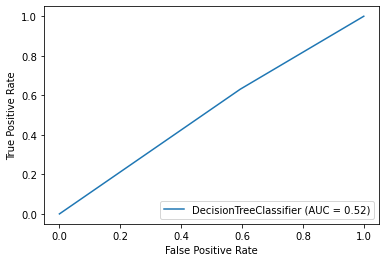

In [92]:
from sklearn.metrics import plot_roc_curve # roc_curve for  Decision Tree classifer
plot_roc_curve(clf, X_test, y_test)